load data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Normalize using z-score

In [ ]:
def read_and_append(file_path,columns):


    with open(file_path, 'r') as f:
        lines = f.readlines()[1:]


    df = pd.DataFrame(columns=columns)
    file_path = file_path.replace(".txt", "")
    for line in lines:
        row = line.strip().split(',')
        row = [int(s) for s in row]
        df_row = pd.DataFrame([row], columns=columns)
        df = pd.concat([df, df_row], ignore_index=True)

    df['label'] = file_path

    return df

In [ ]:
columns = ['Second', 'Ino', 'Transactions']
main_df = pd.DataFrame(columns=['Second', 'Ino', 'Transactions' , 'label'])

main_df = pd.concat([main_df, read_and_append("readrandom_conv.txt" , columns)], ignore_index=True)

main_df = pd.concat([main_df, read_and_append("readrandomwriterandom_conv.txt" ,columns)], ignore_index=True)

main_df = pd.concat([main_df, read_and_append("readreverse_conv.txt" ,columns)], ignore_index=True)

main_df = pd.concat([main_df, read_and_append("readseq_conv.txt" ,columns)], ignore_index=True)

main_df


,Second,Ino,Transactions,label
0,0,1251145,27,readrandom_conv
1,0,34128,6,readrandom_conv
2,1,34128,36,readrandom_conv
3,1,31612,6,readrandom_conv
4,2,34128,24,readrandom_conv
...,...,...,...,...
4871,165,34128,174,readseq_conv
4872,165,112,6,readseq_conv
4873,165,31612,6,readseq_conv
4874,166,31612,6,readseq_conv


In [ ]:
one_hot_df = pd.get_dummies(main_df['label'], prefix='label')

main_df = main_df.drop(columns=['label'])

main_df = pd.concat([main_df, one_hot_df], axis=1)
main_df

,Second,Ino,Transactions,label_readrandom_conv,label_readrandomwriterandom_conv,label_readreverse_conv,label_readseq_conv
0,0,1251145,27,1,0,0,0
1,0,34128,6,1,0,0,0
2,1,34128,36,1,0,0,0
3,1,31612,6,1,0,0,0
4,2,34128,24,1,0,0,0
...,...,...,...,...,...,...,...
4871,165,34128,174,0,0,0,1
4872,165,112,6,0,0,0,1
4873,165,31612,6,0,0,0,1
4874,166,31612,6,0,0,0,1


In [ ]:



# train_df, test_df = train_test_split(main_df, test_size=0.0, random_state=17)
train_df = main_df
train_features = train_df.iloc[:, :3]
# test_features = test_df.iloc[:, :3]
train_targets = train_df.iloc[:, 3:]
# test_targets = test_df.iloc[:, 3:]
train_targets

,label_readrandom_conv,label_readrandomwriterandom_conv,label_readreverse_conv,label_readseq_conv
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
4871,0,0,0,1
4872,0,0,0,1
4873,0,0,0,1
4874,0,0,0,1


In [ ]:
X_train = train_features.values.astype(np.int64)
Y_train = train_targets.values.astype(np.int64)

# X_test = test_features.values.astype(np.int64)
# Y_test = test_targets.values.astype(np.int64)


X_train

array([[      0, 1251145,      27],
       [      0,   34128,       6],
       [      1,   34128,      36],
       ...,
       [    165,   31612,       6],
       [    166,   31612,       6],
       [    167,   34128,       6]])

In [ ]:
mean_vals = np.mean(X_train, axis=0)
std_vals = np.std(X_train, axis=0)

X_train = (X_train - mean_vals) / std_vals

# X_test = (X_test - mean_vals) / std_vals

X_train

array([[-1.37782124, -0.09983712, -0.35200894],
       [-1.37782124, -0.10286811, -0.35393905],
       [-1.37256655, -0.10286811, -0.35118175],
       ...,
       [-0.51079825, -0.10287438, -0.35393905],
       [-0.50554357, -0.10287438, -0.35393905],
       [-0.50028888, -0.10286811, -0.35393905]])

Visualizing Using T-NSE

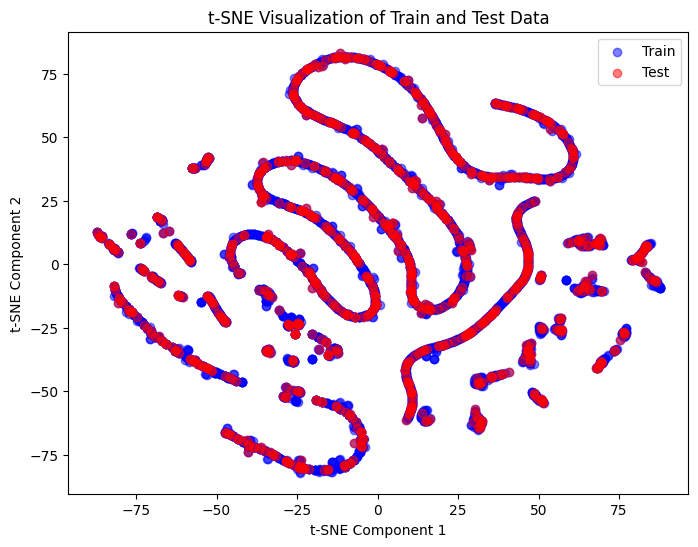

In [ ]:
combined_data = np.vstack([X_train, X_test])
combined_labels = np.hstack([np.zeros(X_train.shape[0]), np.ones(X_test.shape[0])])

tsne = TSNE(n_components=2, random_state=0)
combined_data_2d = tsne.fit_transform(combined_data)


train_data_2d = combined_data_2d[:X_train.shape[0]]
test_data_2d = combined_data_2d[X_train.shape[0]:]

plt.figure(figsize=(8, 6))
plt.scatter(train_data_2d[:, 0], train_data_2d[:, 1], color='blue', label='Train', alpha=0.5)
plt.scatter(test_data_2d[:, 0], test_data_2d[:, 1], color='red', label='Test', alpha=0.5)
plt.title('t-SNE Visualization of Train and Test Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

Neural Network

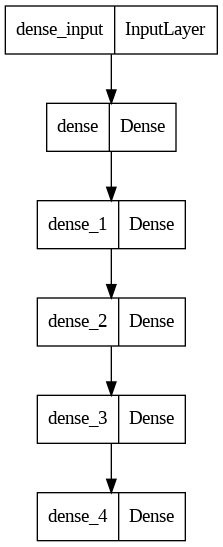

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tf.keras.utils.plot_model(model)


# NN2

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(3,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


kfold = KFold(n_splits=10, shuffle=True, random_state=1)

scores = []

for train, test in kfold.split(X_train):
    model = create_model()
    model.fit(X_train[train], Y_train[train], epochs=20,  verbose=0)
    score = model.evaluate(X_train[test], Y_train[test], verbose=0)
    print(f'Score for fold {len(scores) + 1}: {model.metrics_names[0]} of {score[0]}; {model.metrics_names[1]} of {score[1]*100}%')
    scores.append(score)

print(f'Average scores for all folds:')
print(f'> Accuracy: {np.mean([score[1] for score in scores])*100} (+- {np.std([score[1] for score in scores])})')
print(f'> Loss: {np.mean([score[0] for score in scores])}')


Score for fold 1: loss of 0.7618157863616943; accuracy of 65.36885499954224%
Score for fold 2: loss of 0.7848712205886841; accuracy of 62.29507923126221%
Score for fold 3: loss of 0.6883177161216736; accuracy of 67.00819730758667%
Score for fold 4: loss of 0.7596269845962524; accuracy of 64.75409865379333%
Score for fold 5: loss of 0.7316099405288696; accuracy of 66.39344096183777%
Score for fold 6: loss of 0.7727605104446411; accuracy of 65.57376980781555%
Score for fold 7: loss of 0.7153693437576294; accuracy of 68.99384260177612%
Score for fold 8: loss of 0.7143465280532837; accuracy of 68.99384260177612%
Score for fold 9: loss of 0.6913412809371948; accuracy of 67.14578866958618%
Score for fold 10: loss of 0.742023229598999; accuracy of 66.73511266708374%
Average scores for all folds:
> Accuracy: 66.326202750206 (+- 0.018906429824684573)
> Loss: 0.7362082540988922


In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier, KerasRegressor


def create_model(optimizer="adam"):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(3,)))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(4, activation="softmax"))
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model


model = KerasClassifier(build_fn=create_model, verbose=0)


param_grid = {
    "epochs": [10, 15, 20],
    "optimizer": ["SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax", "Nadam"],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)


print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best: 0.13599129529756834 using {'epochs': 15, 'optimizer': 'Adam'}
0.13004863279402024 (0.09999421404139014) with: {'epochs': 10, 'optimizer': 'SGD'}
0.11404686662251236 (0.10113744518474027) with: {'epochs': 10, 'optimizer': 'RMSprop'}
0.12204472198568139 (0.0992494290049974) with: {'epochs': 10, 'optimizer': 'Adagrad'}
0.13025098558677892 (0.11531394102340443) with: {'epochs': 10, 'optimizer': 'Adadelta'}
0.12963408711010185 (0.10570963072891504) with: {'epochs': 10, 'optimizer': 'Adam'}
0.1197873024884095 (0.10276530382413473) with: {'epochs': 10, 'optimizer': 'Adamax'}
0.12758330967925066 (0.10322483025330721) with: {'epochs': 10, 'optimizer': 'Nadam'}
0.11035266660358911 (0.08892014643496685) with: {'epochs': 15, 'optimizer': 'SGD'}
0.13414640300249156 (0.12015692021315404) with: {'epochs': 15, 'optimizer': 'RMSprop'}
0.1312748604409121 (0.11907950868485478) with: {'epochs': 15, 'optimizer': 'Adagrad'}
0.11609713943293277 (0.09867692564818638) with: {'epochs': 15, 'optimizer': 'A

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(3,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=grid_result.best_params_["optimizer"], loss='categorical_crossentropy', metrics=['accuracy'])
    return model


kfold = KFold(n_splits=10, shuffle=True, random_state=1)

scores = []

for train, test in kfold.split(X_train):
    model = create_model()
    model.fit(X_train[train], Y_train[train], epochs=grid_result.best_params_["epochs"],  verbose=0)
    score = model.evaluate(X_train[test], Y_train[test], verbose=0)
    print(f'Score for fold {len(scores) + 1}: {model.metrics_names[0]} of {score[0]}; {model.metrics_names[1]} of {score[1]*100}%')
    scores.append(score)

print(f'Average scores for all folds:')
print(f'> Accuracy: {np.mean([score[1] for score in scores])*100} (+- {np.std([score[1] for score in scores])})')
print(f'> Loss: {np.mean([score[0] for score in scores])}')


Score for fold 1: loss of 0.7889062762260437; accuracy of 65.36885499954224%
Score for fold 2: loss of 0.8270021677017212; accuracy of 64.54917788505554%
Score for fold 3: loss of 0.6898194551467896; accuracy of 68.23770403862%
Score for fold 4: loss of 0.8077046275138855; accuracy of 61.47540807723999%
Score for fold 5: loss of 0.7160732746124268; accuracy of 68.6475396156311%
Score for fold 6: loss of 0.7739089727401733; accuracy of 63.31967115402222%
Score for fold 7: loss of 0.7217012047767639; accuracy of 69.60985660552979%
Score for fold 8: loss of 0.7179077863693237; accuracy of 69.40451860427856%
Score for fold 9: loss of 0.7254624962806702; accuracy of 66.3244366645813%
Score for fold 10: loss of 0.7662072777748108; accuracy of 64.06570672988892%
Average scores for all folds:
> Accuracy: 66.10028743743896 (+- 0.026560138277896748)
> Loss: 0.7534693539142608


# Decision Tree Classifier


Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Score for fold 1: Accuracy of 63.729508196721305%
Score for fold 2: Accuracy of 62.295081967213115%
Score for fold 3: Accuracy of 65.98360655737704%
Score for fold 4: Accuracy of 62.5%
Score for fold 5: Accuracy of 65.77868852459017%
Score for fold 6: Accuracy of 63.729508196721305%
Score for fold 7: Accuracy of 65.70841889117042%
Score for fold 8: Accuracy of 66.11909650924025%
Score for fold 9: Accuracy of 64.68172484599589%
Score for fold 10: Accuracy of 61.80698151950719%
Average accuracy for all folds: 64.23326152085367% (+- 0.015665484207417736)


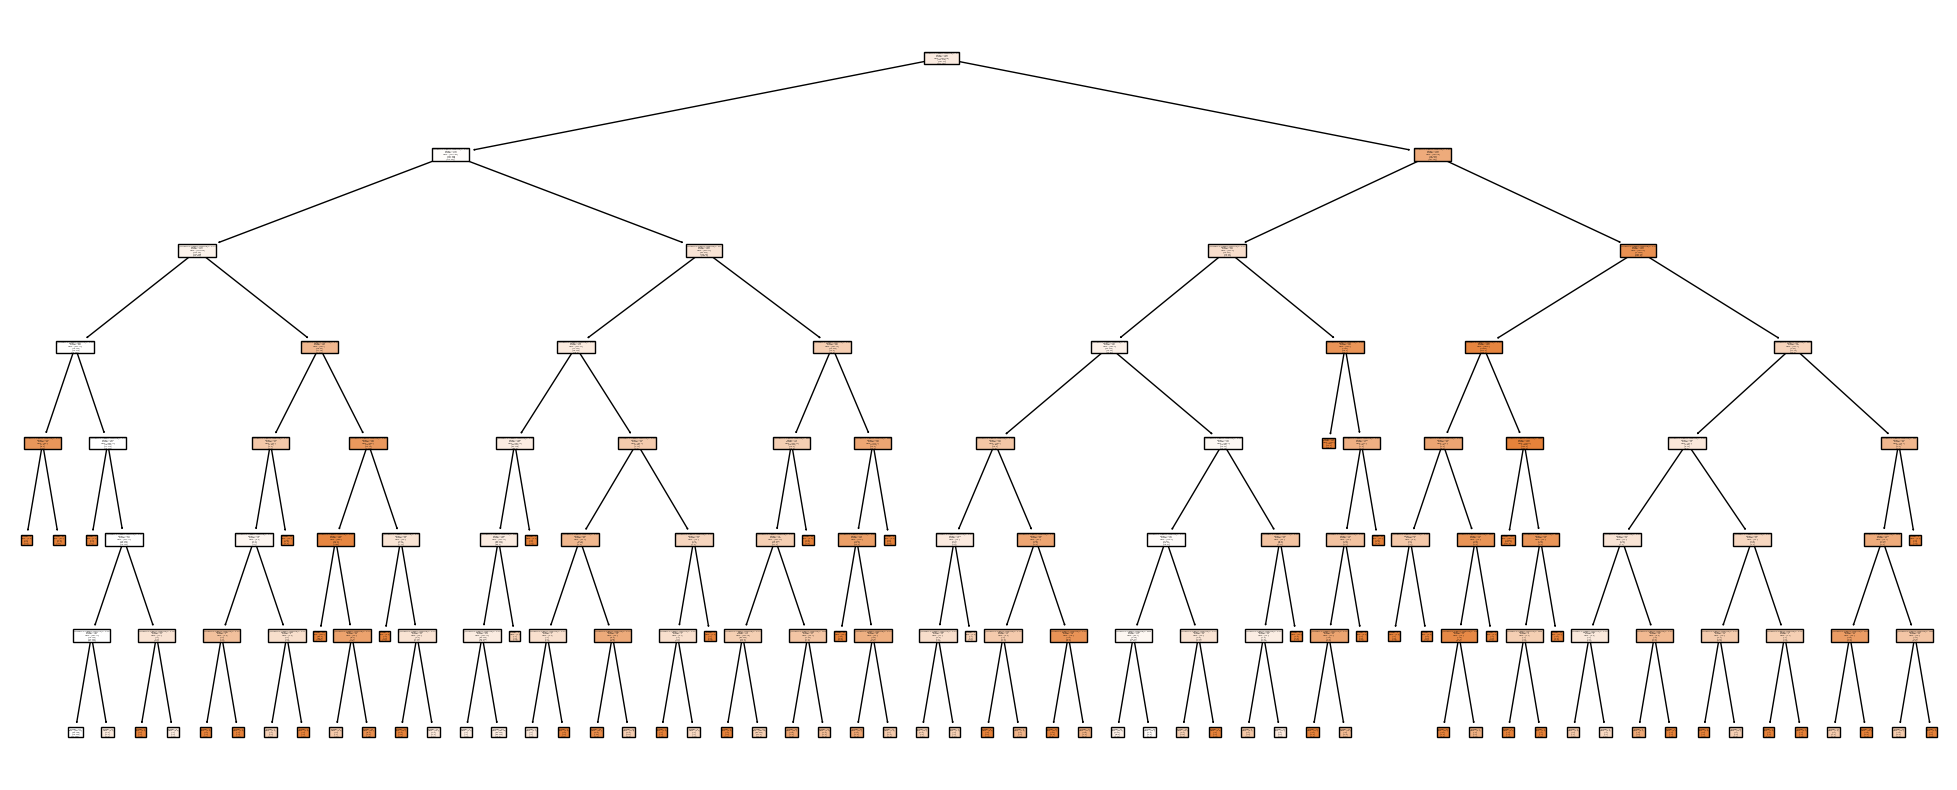

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


clf = DecisionTreeClassifier(criterion='entropy')

param_grid = {
    'max_depth': [None, 3, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kfold, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_clf = grid_search.best_estimator_

print(f'Best hyperparameters: {grid_search.best_params_}')

scores = []
for train, test in kfold.split(X_train):
    y_pred = best_clf.predict(X_train[test])
    accuracy = accuracy_score(Y_train[test], y_pred)
    print(f'Score for fold {len(scores) + 1}: Accuracy of {accuracy*100}%')
    scores.append(accuracy)

print(f'Average accuracy for all folds: {np.mean(scores)*100}% (+- {np.std(scores)})')

plt.figure(figsize=(25, 10))
plot_tree(best_clf, filled=True, feature_names=X_train, class_names=["readrandom" , "readrandomwriterandom" ,"readreveerse" , "readsq"])
plt.show()
